# Setup

Pandas is a library that is the de facto standard to do data analysis in Python, and we'll be using it here.
To start off, make sure it's installed (`pip install pandas`):

In [267]:
import pandas as pd

Importing pandas as `pd` is a common abbreviation, since you'll be using pandas a lot.

Then, the best way to start is to grab some data (`pokemon.csv`) and load it in with the function `read_csv`:

In [268]:
pokemon = pd.read_csv("pokemon.csv")


# First look at the data

When you load a new dataset, the first thing you want to do is to take a global look at the data, to get an idea for what you have.

The best first thing you can do is inspect the “head” of the data, which corresponds to the first few rows:

In [269]:
pokemon.head()


,national_number,gen,english_name,japanese_name,primary_type,secondary_type,classification,percent_male,percent_female,height_m,...,evochain_1,evochain_2,evochain_3,evochain_4,evochain_5,evochain_6,gigantamax,mega_evolution,mega_evolution_alt,description
0,1,I,Bulbasaur,Fushigidane,grass,poison,Seed Pokémon,88.14,11.86,0.7,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,There is a plant seed on its back right from t...
1,2,I,Ivysaur,Fushigisou,grass,poison,Seed Pokémon,88.14,11.86,1.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,NaN,NaN,NaN,"When the bulb on its back grows large, it appe..."
2,3,I,Venusaur,Fushigibana,grass,poison,Seed Pokémon,88.14,11.86,2.0,...,Level,Ivysaur,Level,Venusaur,NaN,NaN,Gigantamax Venusaur,Mega Venusaur,NaN,Its plant blooms when it is absorbing solar en...
3,4,I,Charmander,Hitokage,fire,NaN,Lizard Pokémon,88.14,11.86,0.6,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,It has a preference for hot things. When it ra...
4,5,I,Charmeleon,Lizardo,fire,NaN,Flame Pokémon,88.14,11.86,1.1,...,Level,Charmeleon,Level,Charizard,NaN,NaN,NaN,NaN,NaN,"It has a barbaric nature. In battle, it whips ..."


This shows the first 5 rows, as you can see by the information at the bottom-left corner, and 55 columns.
We have so many columns that they aren't all visible at first.

If we want, we can check which columns we have with the attribute `columns` on `pokemon`:

In [270]:
pokemon.columns


Index(['national_number', 'gen', 'english_name', 'japanese_name',
       'primary_type', 'secondary_type', 'classification', 'percent_male',
       'percent_female', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'abilities_0', 'abilities_1', 'abilities_2',
       'abilities_hidden', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'is_sublegendary',
       'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2',
       'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax',
       'mega_evolution', 'mega_evolution_alt', 'description'],
      dtype='object')

This shows the names of the 55 columns that our data has...

But what _is_ our data?

In pandas, we'll often deal with something called a “dataframe”.
Dataframes are 2D objects that contain data.
Each row represents a data point and each column represents a variable/measurement.

Our variable `pokemon` is a dataframe:

In [271]:
type(pokemon)


pandas.core.frame.DataFrame

The columns in a dataframe are called series.
A series contains all of the values of a given variable and it's “kind of like a list”, in the sense that it is a 1D container.
For example, the series `pokemon["english_name"]` contains all of the English names of our Pokémon and we can see it has `898` values:

In [272]:
len(pokemon["english_name"])


898

But a series is _much more_ than just a list.
It contains many more useful methods and attributes that let us work with data.

Let us see what this series looks like:

In [273]:
pokemon["english_name"]


0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
893     Regieleki
894     Regidrago
895     Glastrier
896     Spectrier
897       Calyrex
Name: english_name, Length: 898, dtype: object

The series is so long (it has 898 elements) that the output only shows the first and the last values, inserting an ellipsis `...` in the middle.

# Data types

In the output of the series, above, we see several Pokémon names:

 1. Bulbasaur;
 2. Ivysaur;
 3. Venusaur; ...

At the bottom, we also see three other pieces of information:

```
Name: english_name, Length: 898, dtype: object
```

This shows the name of the series (the name of the column), its length, and the data type (“dtype”, for short) of that column.

When we're dealing with a new data set, we should always check the data types of its columns:

In [274]:
print(pokemon.dtypes)


national_number         int64
gen                    object
english_name           object
japanese_name          object
primary_type           object
secondary_type         object
classification         object
percent_male           object
percent_female         object
height_m              float64
weight_kg             float64
capture_rate           object
base_egg_steps          int64
hp                      int64
attack                  int64
defense                 int64
sp_attack               int64
sp_defense              int64
speed                   int64
abilities_0            object
abilities_1            object
abilities_2            object
abilities_hidden       object
against_normal        float64
against_fire          float64
against_water         float64
against_electric      float64
against_grass         float64
against_ice           float64
against_fighting      float64
against_poison        float64
against_ground        float64
against_flying        float64
against_ps

When you loaded the data, Pandas did its best to figure out what columns should be of what type, but sometimes you need to help Pandas out and do some conversions yourself.
Throughout this tutorial, we'll convert some columns to more appropriate data types.

# Working with numerical series

## Pokémon stats

Pokémon have 6 basic stats:

 1. HP (hit points or health points);
 2. attack;
 3. defense;
 4. special attack;
 5. special defense; and
 6. speed.

These dictate how strong a Pokémon is when battling other Pokémon.
Here is a brief explanation of what each stat means:

 1. HP dictates how much damage a Pokémon can sustain before fainting.
 2. The stats “attack” and “special attack” influence how much damage a Pokémon inflicts when attacking. The stat “attack” is for attacks that make physical contact and the stat “special attack” is for attacks that don't (for example, magical attacks).
 3. The stats “defense” and “special defense” reduce the damage you take when being attacked, respectively by physical or non-physical attacks.
 4. The stat “speed” influences whether you attack before your opponent or not.

The dataset contains six columns that provide information about the values of these stats.
For example, we can easily grab the column with the information about HP for all Pokémon:

In [275]:
pokemon["hp"]


0       45
1       60
2       80
3       39
4       58
      ... 
893     80
894    200
895    100
896    100
897    100
Name: hp, Length: 898, dtype: int64

The values in the column are not the actual HP of each Pokémon.
Instead, they're a measurement that you can use in a formula to compute the HP a Pokémon will have when fully grown (at level 100).
The formula is as follows:

$$
2 \times hp + 110
$$

For example, the first Pokémon in the series has a base HP of 45, which means that it will have 200 HP when fully grown:

In [276]:
2 * pokemon["hp"][0] + 110


200

## Basic mathematical operations

When working with Pandas series, basic mathematical operations can be performed _on the whole series_ at once.
Above, the expression `2 * pokemon["hp"][0] + 110` computed the final HP for a single Pokémon.
If we drop the index `[0]`, we compute the final HP for _all_ Pokémon:

In [277]:
2 * pokemon["hp"] + 110


0      200
1      230
2      270
3      188
4      226
      ... 
893    270
894    510
895    310
896    310
897    310
Name: hp, Length: 898, dtype: int64

The ability to perform mathematical operations like addition and multiplication between a single number and a whole series is called broadcasting.

## Computing the other final stats

All other five stats have a similar formula, but instead of adding 110 at the end, you add 5:

In [278]:
2 * pokemon["attack"] + 5


0      103
1      129
2      169
3      109
4      133
      ... 
893    205
894    205
895    295
896    135
897    165
Name: attack, Length: 898, dtype: int64

In [279]:
2 * pokemon["defense"] + 5


0      103
1      131
2      171
3       91
4      121
      ... 
893    105
894    105
895    265
896    125
897    165
Name: defense, Length: 898, dtype: int64

In [280]:
2 * pokemon["sp_attack"] + 5


0      135
1      165
2      205
3      125
4      165
      ... 
893    205
894    205
895    135
896    295
897    165
Name: sp_attack, Length: 898, dtype: int64

In [281]:
2 * pokemon["sp_defense"] + 5


0      135
1      165
2      205
3      105
4      135
      ... 
893    105
894    105
895    225
896    165
897    165
Name: sp_defense, Length: 898, dtype: int64

In [282]:
2 * pokemon["speed"] + 5


0       95
1      125
2      165
3      135
4      165
      ... 
893    405
894    165
895     65
896    265
897    165
Name: speed, Length: 898, dtype: int64

These computations were _all_ the same, so wouldn't it be nice if we could do everything at once, given that the formula is exactly the same..?

# Manipulating columns

## Fetching multiple columns

You can use a list of column names to grab multiple columns at once:

In [283]:
stats = ["attack", "defense", "sp_attack", "sp_defense", "speed"]
pokemon[stats].head()


,attack,defense,sp_attack,sp_defense,speed
0,49,49,65,65,45
1,62,63,80,80,60
2,82,83,100,100,80
3,52,43,60,50,65
4,64,58,80,65,80


Now, `pokemon[stats]` is not a series, but a (smaller) dataframe.
However, the principles of broadcasting apply just the same:

In [284]:
2 * pokemon[stats] + 5


,attack,defense,sp_attack,sp_defense,speed
0,103,103,135,135,95
1,129,131,165,165,125
2,169,171,205,205,165
3,109,91,125,105,135
4,133,121,165,135,165
...,...,...,...,...,...
893,205,105,205,105,405
894,205,105,205,105,165
895,295,265,135,225,65
896,135,125,295,165,265


## Dropping columns

Given that we now know syntax that we can use to grab only some columns, we could use this same syntax to drop columns that we don't care about.

Let us review all of the columns that we have:

In [285]:
pokemon.columns


Index(['national_number', 'gen', 'english_name', 'japanese_name',
       'primary_type', 'secondary_type', 'classification', 'percent_male',
       'percent_female', 'height_m', 'weight_kg', 'capture_rate',
       'base_egg_steps', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'abilities_0', 'abilities_1', 'abilities_2',
       'abilities_hidden', 'against_normal', 'against_fire', 'against_water',
       'against_electric', 'against_grass', 'against_ice', 'against_fighting',
       'against_poison', 'against_ground', 'against_flying', 'against_psychic',
       'against_bug', 'against_rock', 'against_ghost', 'against_dragon',
       'against_dark', 'against_steel', 'against_fairy', 'is_sublegendary',
       'is_legendary', 'is_mythical', 'evochain_0', 'evochain_1', 'evochain_2',
       'evochain_3', 'evochain_4', 'evochain_5', 'evochain_6', 'gigantamax',
       'mega_evolution', 'mega_evolution_alt', 'description'],
      dtype='object')

We only care about these:

 - `national_number`
 - `gen`
 - `english_name`
 - `primary_type`
 - `secondary_type`
 - `hp`
 - `attack`
 - `defense`
 - `sp_attack`
 - `sp_defense`
 - `speed`
 - `is_sublegendary`
 - `is_legendary`
 - `is_mythical`

Here's how we can grab them:

In [286]:
pokemon[
    [
        "national_number",
        "gen",
        "english_name",
        "primary_type",
        "secondary_type",
        "hp",
        "attack",
        "defense",
        "sp_attack",
        "sp_defense",
        "speed",
        "is_sublegendary",
        "is_legendary",
        "is_mythical",
    ]
].head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_sublegendary,is_legendary,is_mythical
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,45,0,0,0
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,60,0,0,0
2,3,I,Venusaur,grass,poison,80,82,83,100,100,80,0,0,0
3,4,I,Charmander,fire,NaN,39,52,43,60,50,65,0,0,0
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,80,0,0,0


Almost all Pandas operations do _not_ mutate the series/dataframes that you use as arguments and, instead, they return _new_ series/dataframes with the computed results.
So, if we want to keep the dataframe with just these 14 columns, we need to assign the result back into `pokemon`:

In [287]:
pokemon = pokemon[
    [
        "national_number",
        "gen",
        "english_name",
        "primary_type",
        "secondary_type",
        "hp",
        "attack",
        "defense",
        "sp_attack",
        "sp_defense",
        "speed",
        "is_sublegendary",
        "is_legendary",
        "is_mythical",
    ]
]
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_sublegendary,is_legendary,is_mythical
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,45,0,0,0
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,60,0,0,0
2,3,I,Venusaur,grass,poison,80,82,83,100,100,80,0,0,0
3,4,I,Charmander,fire,NaN,39,52,43,60,50,65,0,0,0
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,80,0,0,0


Now that we got rid of a bunch of columns we don't care about, let us create some new columns that we _do_ care about.

## Creating new columns

You can use the method `assign` to create new columns.
Just check the output below and scroll to the right:

In [288]:
pokemon.assign(
    hp_final = 2 * pokemon["hp"] + 110
).head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_sublegendary,is_legendary,is_mythical,hp_final
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,45,0,0,0,200
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,60,0,0,0,230
2,3,I,Venusaur,grass,poison,80,82,83,100,100,80,0,0,0,270
3,4,I,Charmander,fire,NaN,39,52,43,60,50,65,0,0,0,188
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,80,0,0,0,226


If we save the result of that method call into the name `pokemon`, we keep the new columns:

In [289]:
pokemon = pokemon.assign(
    hp_final = 2 * pokemon["hp"] + 110
)
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_sublegendary,is_legendary,is_mythical,hp_final
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,45,0,0,0,200
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,60,0,0,0,230
2,3,I,Venusaur,grass,poison,80,82,83,100,100,80,0,0,0,270
3,4,I,Charmander,fire,NaN,39,52,43,60,50,65,0,0,0,188
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,80,0,0,0,226


You can also assign the columns directly by using the `[]` syntax to refer to columns that may not even exist yet.
The method `assign` is always preferable when possible, but this example shows how this works:

In [290]:
stats


['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

In [291]:
final_stats = [stat + "_final" for stat in stats]
final_stats


['attack_final',
 'defense_final',
 'sp_attack_final',
 'sp_defense_final',
 'speed_final']

In [292]:
pokemon[final_stats] = 2 * pokemon[stats] + 5
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,45,0,0,0,200,103,103,135,135,95
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,60,0,0,0,230,129,131,165,165,125
2,3,I,Venusaur,grass,poison,80,82,83,100,100,80,0,0,0,270,169,171,205,205,165
3,4,I,Charmander,fire,NaN,39,52,43,60,50,65,0,0,0,188,109,91,125,105,135
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,80,0,0,0,226,133,121,165,135,165


If you scroll all the way to the right, you will see that we just created 5 more columns with the final values for the stats “attack”, “defense”, “special attack”, “special defense”, and “speed”.

# Broadcasting and dimensions

As a quick bonus/aside, part of the art of using Pandas is getting used to broadcasting and the ability to operate on whole series and dataframes at once.
In the section above, we used the expression `2 * pokemon[stats] + 5` to compute the final values for 5 of the 6 stats...
But what if we wanted to compute the final stats for _all 6 stats at once_?

The difficulty lies on the fact that the formula for the stat HP is slightly different.
However, that doesn't pose a real challenge because broadcasting can work on multiple levels:

In [293]:
all_stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
2 * pokemon[all_stats] + (110, 5, 5, 5, 5, 5)


,hp,attack,defense,sp_attack,sp_defense,speed
0,200,103,103,135,135,95
1,230,129,131,165,165,125
2,270,169,171,205,205,165
3,188,109,91,125,105,135
4,226,133,121,165,135,165
...,...,...,...,...,...,...
893,270,205,105,205,105,405
894,510,205,105,205,105,165
895,310,295,265,135,225,65
896,310,135,125,295,165,265


Notice that the expression `2 * pokemon[stats] + (110, 5, 5, 5, 5, 5)` contains elements of 3 different dimensions:

 - the number `2` is a single integer and has no dimension;
 - the tuple `(110, 5, 5, 5, 5, 5)` is an iterable of integers, so it's 1D; and
 - the dataframe `pokemon[stats]` is 2D.

The multiplication `2 * pokemon[stats]` results in a 2D dataframe and so, when Pandas does the addition with `(110, 5, 5, 5, 5, 5)`, it understands that it should broadcast the tuple to _all of the rows_ of the dataframe, so that the numbers in the tuple get added to all of the rows of the dataframe.

# Maths with series

## Adding series together

There is another column that we want to compute that provides another measure of the strength of a Pokémon.
This value is the sum of the six base stats.

We've seen that we can add single numbers to series but we can also add two series together:

In [294]:
pokemon["hp"].head()


0    45
1    60
2    80
3    39
4    58
Name: hp, dtype: int64

In [295]:
pokemon["attack"].head()


0    49
1    62
2    82
3    52
4    64
Name: attack, dtype: int64

In [296]:
(pokemon["hp"] + pokemon["attack"]).head()


0     94
1    122
2    162
3     91
4    122
dtype: int64

So, if we're not lazy, we can easily compute the total base stats for each Pokémon:

In [297]:
pokemon["hp"] + pokemon["attack"] + pokemon["defense"] + pokemon["sp_attack"] + pokemon["sp_defense"] + pokemon["speed"]


0      318
1      405
2      525
3      309
4      405
      ... 
893    580
894    580
895    580
896    580
897    500
Length: 898, dtype: int64

We might as well make a new column out of it:

In [298]:
pokemon = pokemon.assign(
    total = pokemon["hp"] + pokemon["attack"] + pokemon["defense"] + pokemon["sp_attack"] + pokemon["sp_defense"] + pokemon["speed"]
)
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,...,0,0,0,200,103,103,135,135,95,318
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,0,0,0,230,129,131,165,165,125,405
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,0,0,0,270,169,171,205,205,165,525
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,0,0,0,188,109,91,125,105,135,309
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,0,0,0,226,133,121,165,135,165,405


The code above showed how to add two or more series together, but as you might imagine, there are many other operations that you could perform.

The example above also warrants a word of caution:
when doing calculations with whole series from the same dataframe, the operation typically applies to the corresponding pairs of numbers.
When you're doing calculations with series coming from different dataframes, you have to be slightly more careful.

## Computing series values

Series have many methods that let you compute useful values or measurements.
For example, with the methods `min` and `max` you can quickly find out what are the total strengths of the weakest and the strongest Pokémon in our data set:

In [299]:
pokemon["total"].min()


175

In [300]:
pokemon["total"].max()


720

This also works across series if you have a dataframe:

In [301]:
pokemon[all_stats].min()


hp             1
attack         5
defense        5
sp_attack     10
sp_defense    20
speed          5
dtype: int64

In [302]:
pokemon[all_stats].max()


hp            255
attack        181
defense       230
sp_attack     173
sp_defense    230
speed         200
dtype: int64

Another commonly useful method is the method `sum`:

In [303]:
pokemon[all_stats].sum()


hp            61990
attack        68737
defense       64554
sp_attack     62574
sp_defense    62749
speed         59223
dtype: int64

The result above shows that the stat “attack” seems to be the strongest one, on average, which we can easily verify by computing the means instead of the sums:

In [304]:
pokemon[all_stats].mean()


hp            69.031180
attack        76.544543
defense       71.886414
sp_attack     69.681514
sp_defense    69.876392
speed         65.949889
dtype: float64

# Axis

Besides the notion of dimension (a number is 0D, a series is 1D, and a dataframe is 2D), it is also important to be aware of the notion of axis.
The axes of an object represent its dimensions and many operations can be tweaked to apply in different ways to different axes.

For example, let us go back to the example of summing all of the stats of all Pokémon:

In [305]:
pokemon[all_stats].sum()


hp            61990
attack        68737
defense       64554
sp_attack     62574
sp_defense    62749
speed         59223
dtype: int64

This summed the “HP” for all Pokémon, the “attack” for all Pokémon, etc.
It is like the `sum` operated on the columns of the dataframe.
By playing with the axis of the operation, we can instead ask for Pandas to sum all of the stats of each row:

In [306]:
pokemon[all_stats].sum(axis=1)


0      318
1      405
2      525
3      309
4      405
      ... 
893    580
894    580
895    580
896    580
897    500
Length: 898, dtype: int64

This new computation produces a single series that matches the series “total” that we computed before.

So, another way in which we could have computed the series “total” was by computing a sum along the axis 1:

In [307]:
pokemon.assign(
    total = pokemon[all_stats].sum(axis=1)
)


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,...,0,0,0,200,103,103,135,135,95,318
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,0,0,0,230,129,131,165,165,125,405
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,0,0,0,270,169,171,205,205,165,525
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,0,0,0,188,109,91,125,105,135,309
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,0,0,0,226,133,121,165,135,165,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,electric,NaN,80,100,50,100,50,...,1,0,0,270,205,105,205,105,405,580
894,895,VIII,Regidrago,dragon,NaN,200,100,50,100,50,...,1,0,0,510,205,105,205,105,165,580
895,896,VIII,Glastrier,ice,NaN,100,145,130,65,110,...,1,0,0,310,295,265,135,225,65,580
896,897,VIII,Spectrier,ghost,NaN,100,65,60,145,80,...,0,0,0,310,135,125,295,165,265,580


# Series data type conversion

Let us now turn our attention to the columns `is_sublegendary`, `is_legendary`, and `is_mythical`, which currently are series with the values `0` or `1`, but which should be Boolean columns with the values `True` or `False`.

You can check the type of a series by checking the attribute `dtype` (which stands for **d**ata **type**):

In [308]:
pokemon["is_sublegendary"].dtype


dtype('int64')

To convert the type of a series, you can use the method `astype`.
The method `astype` can accept type names to determine what type(s) your data will be converted to.
For Boolean values, you can use the type name `"bool"`:

In [309]:
pokemon["is_sublegendary"].astype("bool")


0      False
1      False
2      False
3      False
4      False
       ...  
893     True
894     True
895     True
896    False
897    False
Name: is_sublegendary, Length: 898, dtype: bool

You can also use the method `astype` to convert multiple columns at once if you provide a dictionary that maps column names to their new types:

In [310]:
pokemon = pokemon.astype(
    {
        "is_sublegendary": "bool",
        "is_legendary": "bool",
        "is_mythical": "bool",
    }
)
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,...,False,False,False,200,103,103,135,135,95,318
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,False,False,False,230,129,131,165,165,125,405
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,False,False,False,270,169,171,205,205,165,525
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,False,False,False,188,109,91,125,105,135,309
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,False,False,False,226,133,121,165,135,165,405


# Working with Boolean series

There are many useful concepts that we can explore if we do a bit of work with these Boolean series.

## How many?

Because Boolean series answer a yes/no question, one typical thing you might wonder is “how many `True` values are there in my series?”.
We can answer this question with the method `sum`:

In [311]:
pokemon["is_legendary"].sum()


20

We've seen this also works on dataframes, so we can easily figure out how many Pokémon are sublegendary, how many are legendary, and how many are mythical:

In [312]:
legendary_columns = [
    "is_sublegendary",
    "is_legendary",
    "is_mythical",
]
pokemon[legendary_columns].sum()


is_sublegendary    45
is_legendary       20
is_mythical        20
dtype: int64

## What percentage?

Another common idiom when working with Boolean data is to figure out what percentage of data points satisfy the predicate set by the Boolean series.
This can be done by counting (summing) and then dividing by the total, which is what the method `mean` does:

In [313]:
pokemon[legendary_columns].mean()


is_sublegendary    0.050111
is_legendary       0.022272
is_mythical        0.022272
dtype: float64

This shows that roughly 5% of all Pokémon are sublegendary, 2.2% are legendary, and another 2.2% are mythical.

## Which ones?

Boolean series can also be used to extract parts of your data.
To do this, all you have to do is use the Boolean series as the index into the dataframe of the other column.

The example below slices the data to only show the rows of mythical Pokémon:

In [314]:
pokemon[pokemon["is_mythical"]]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
150,151,I,Mew,psychic,NaN,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
250,251,II,Celebi,psychic,grass,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
384,385,III,Jirachi,steel,psychic,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
385,386,III,Deoxys,psychic,NaN,50,150,50,150,50,...,False,False,True,210,305,105,305,105,305,600
488,489,IV,Phione,water,NaN,80,80,80,80,80,...,False,False,True,270,165,165,165,165,165,480
489,490,IV,Manaphy,water,NaN,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
490,491,IV,Darkrai,dark,NaN,70,90,90,135,90,...,False,False,True,250,185,185,275,185,255,600
491,492,IV,Shaymin,grass,grass,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
492,493,IV,Arceus,normal,NaN,120,120,120,120,120,...,False,False,True,350,245,245,245,245,245,720
493,494,V,Victini,psychic,fire,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600


Notice how the output says it contains 20 rows which is precisely how many mythical Pokémon there are.

We can also index _only_ a specific column.
For example, the operation below returns the names of the 20 mythical Pokémon:

In [315]:
pokemon["english_name"][pokemon["is_mythical"]]


150          Mew
250       Celebi
384      Jirachi
385       Deoxys
488       Phione
489      Manaphy
490      Darkrai
491      Shaymin
492       Arceus
493      Victini
646       Keldeo
647     Meloetta
648     Genesect
718      Diancie
719        Hoopa
720    Volcanion
800     Magearna
801    Marshadow
806      Zeraora
807       Meltan
Name: english_name, dtype: object

## Comparison operators

Comparison operators can be used to manipulate series and build more interesting data queries.
For example, we can easily figure out how many Pokémon are from the first generation by comparing the column “gen” with the value `"I"` and then adding it up:

In [316]:
(pokemon["gen"] == "I").sum()


151

We can also see how many Pokémon have their base strength above 600, which is considered a very strong Pokémon:

In [317]:
(pokemon["total"] > 600).sum()


22

Now we might wonder: do all of them have some sort of legendary status?

In [318]:
legendary_status_columns = pokemon[legendary_columns]
legendary_status_columns[pokemon["total"] > 600]


,is_sublegendary,is_legendary,is_mythical
149,False,True,False
248,False,True,False
249,False,True,False
288,False,False,False
381,False,True,False
382,False,True,False
383,False,True,False
482,False,True,False
483,False,True,False
485,True,False,False


If you look closely, you'll see that there are 4 Pokémon that have their base stats above 600 and are not any sort of legendary.
Which ones are they..?
Let us find out!

# Boolean operators

In order to figure out which Pokémon are not legendary and have their base total above 600, we'll start by seeing how we can use Boolean operators with Pandas.
In Python, we have the operators `and`, `or`, and `not` to work with Booleans:

In [319]:
True or False and not True


True

However, these don't work out of the box with Pandas.
For example, if we wanted to summarise the three columns `is_sublegendary`, `is_legendary`, and `is_mythical`, we might think of using the operator `or` to combine the series, but that doesn't work:

In [320]:
pokemon["is_sublegendary"] or pokemon["is_legendary"] or pokemon["is_mythical"]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

The error message mentions some useful functions, but they're not what we want to use now.

Instead, we want to use the operators `&`, `|`, and `~`:

 - `&` substitutes `and`, so `a & b` is kind of like applying `and` on respective pairs of elements;
 - `|` substitutes `or`, so `a | b` is kind of like applying `or` on respective pairs of elements; and
 - `~` substitutes `not`, so `~a` is kind of like applying `not` to each element on a column.

As an example usage of the operator `&`, we can see that no Pokémon is flagged as being sublegendary and legendary at the same time:

In [321]:
pokemon[pokemon["is_legendary"] & pokemon["is_sublegendary"]]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total


As an example usage of the operator `|`, these are the Pokémon that are sublegendary or legendary:

In [322]:
pokemon[pokemon["is_legendary"] | pokemon["is_sublegendary"]]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
143,144,I,Articuno,ice,flying,90,85,100,95,125,...,True,False,False,290,175,205,195,255,175,580
144,145,I,Zapdos,electric,flying,90,90,85,125,90,...,True,False,False,290,185,175,255,185,205,580
145,146,I,Moltres,fire,flying,90,100,90,125,85,...,True,False,False,290,205,185,255,175,185,580
149,150,I,Mewtwo,psychic,NaN,106,110,90,154,90,...,False,True,False,322,225,185,313,185,265,680
242,243,II,Raikou,electric,NaN,90,85,75,115,100,...,True,False,False,290,175,155,235,205,235,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,VIII,Kubfu,fighting,NaN,60,90,60,53,50,...,True,False,False,230,185,125,111,105,149,385
891,892,VIII,Urshifu,fighting,dark,100,130,100,63,60,...,True,False,False,310,265,205,131,125,199,550
893,894,VIII,Regieleki,electric,NaN,80,100,50,100,50,...,True,False,False,270,205,105,205,105,405,580
894,895,VIII,Regidrago,dragon,NaN,200,100,50,100,50,...,True,False,False,510,205,105,205,105,165,580


We can use the operator more than once, naturally:

In [323]:
legendary = pokemon["is_sublegendary"] | pokemon["is_legendary"] | pokemon["is_mythical"]
pokemon[legendary]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
143,144,I,Articuno,ice,flying,90,85,100,95,125,...,True,False,False,290,175,205,195,255,175,580
144,145,I,Zapdos,electric,flying,90,90,85,125,90,...,True,False,False,290,185,175,255,185,205,580
145,146,I,Moltres,fire,flying,90,100,90,125,85,...,True,False,False,290,205,185,255,175,185,580
149,150,I,Mewtwo,psychic,NaN,106,110,90,154,90,...,False,True,False,322,225,185,313,185,265,680
150,151,I,Mew,psychic,NaN,100,100,100,100,100,...,False,False,True,310,205,205,205,205,205,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,VIII,Kubfu,fighting,NaN,60,90,60,53,50,...,True,False,False,230,185,125,111,105,149,385
891,892,VIII,Urshifu,fighting,dark,100,130,100,63,60,...,True,False,False,310,265,205,131,125,199,550
893,894,VIII,Regieleki,electric,NaN,80,100,50,100,50,...,True,False,False,270,205,105,205,105,405,580
894,895,VIII,Regidrago,dragon,NaN,200,100,50,100,50,...,True,False,False,510,205,105,205,105,165,580


And we can use the operator `~` to negate a condition, finally figuring out which Pokémon are _not_ legendary and still quite strong:

In [324]:
pokemon[(pokemon["total"] > 600) & (~legendary)]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_sublegendary,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total
288,289,III,Slaking,normal,NaN,150,160,100,95,65,...,False,False,False,410,325,205,195,135,205,670
887,888,VIII,Zacian,fairy,fairy,92,130,115,80,115,...,False,False,False,294,265,235,165,235,281,670
888,889,VIII,Zamazenta,fighting,fighting,92,130,115,80,115,...,False,False,False,294,265,235,165,235,281,670
889,890,VIII,Eternatus,poison,dragon,140,85,95,145,95,...,False,False,False,390,175,195,295,195,265,690


To conclude, we'll save the series `legendary` for later, as it will be quite helpful:

In [325]:
pokemon = pokemon.assign(
    legendary = legendary,
)
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total,legendary
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,...,False,False,200,103,103,135,135,95,318,False
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,False,False,230,129,131,165,165,125,405,False
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,False,False,270,169,171,205,205,165,525,False
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,False,False,188,109,91,125,105,135,309,False
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,False,False,226,133,121,165,135,165,405,False


# Missing data

Dealing with missing data is a big part of working with data.
Figuring out if there are missing values in certain columns and deciding how to best handle those situations are questions you should always have in mind.

The method `isna` finds which values are not available (NA – not available).
Figuring out what columns have NA values is a matter of using `isna` followed by `sum`:

In [326]:
pokemon.isna().sum()


national_number       0
gen                   0
english_name          0
primary_type          0
secondary_type      429
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
is_sublegendary       0
is_legendary          0
is_mythical           0
hp_final              0
attack_final          0
defense_final         0
sp_attack_final       0
sp_defense_final      0
speed_final           0
total                 0
legendary             0
dtype: int64

As we can see, the column “secondary_type” has 429 missing values.
In our case, this is expected because some Pokémon only have a primary value.

The method `isna` produces a Boolean series, so we can use the result of that to index into the dataframe and see which Pokémon only have a primary type:

In [327]:
only_primary_type = pokemon["secondary_type"].isna()
pokemon[only_primary_type]


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total,legendary
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,False,False,188,109,91,125,105,135,309,False
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,False,False,226,133,121,165,135,165,405,False
6,7,I,Squirtle,water,NaN,44,48,65,50,64,...,False,False,198,101,135,105,133,91,314,False
7,8,I,Wartortle,water,NaN,59,63,80,65,80,...,False,False,228,131,165,135,165,121,405,False
8,9,I,Blastoise,water,NaN,79,83,100,85,105,...,False,False,268,171,205,175,215,161,530,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,VIII,Kubfu,fighting,NaN,60,90,60,53,50,...,False,False,230,185,125,111,105,149,385,True
893,894,VIII,Regieleki,electric,NaN,80,100,50,100,50,...,False,False,270,205,105,205,105,405,580,True
894,895,VIII,Regidrago,dragon,NaN,200,100,50,100,50,...,False,False,510,205,105,205,105,165,580,True
895,896,VIII,Glastrier,ice,NaN,100,145,130,65,110,...,False,False,310,295,265,135,225,65,580,True


When dealing with missing data, we are also likely to want to use the method `fillna`.
This method will fill the missing values it can find.

One way to use `fillna` is by providing a single value that will replace _all_ of the missing values:

In [328]:
pokemon["secondary_type"].fillna("<no secondary type>")


0                   poison
1                   poison
2                   poison
3      <no secondary type>
4      <no secondary type>
              ...         
893    <no secondary type>
894    <no secondary type>
895    <no secondary type>
896    <no secondary type>
897                  grass
Name: secondary_type, Length: 898, dtype: object

You can also fill the missing data with a full series of values.
In this example, we're filling the secondary type with a copy of the primary type so that it shows up duplicated:

In [329]:
pokemon["secondary_type"].fillna(pokemon["primary_type"])


0        poison
1        poison
2        poison
3          fire
4          fire
         ...   
893    electric
894      dragon
895         ice
896       ghost
897       grass
Name: secondary_type, Length: 898, dtype: object

One interesting thing to notice about the call above is that the NA values were roughly 400, the column `pokemon["primary_type"]` has 898 values, and pandas still knew how to fill the data.
Pandas did this by using the “index” of each row to figure out which rows had missing data, and then it extracted the new values from the corresponding indices.
This index is the thing that gets printed at the left margin whenever we print a series or a dataframe.

# Categorical data

## What data should be categorical?

Now that we've started taking a look at the Pokémon types, you probably noticed that this column contains a _lot_ of repeated values.
In fact, there are only 18 unique values for the types:

In [330]:
pokemon["primary_type"].nunique()


18

We can easily see the unique values and count how many of each we have:

In [331]:
pokemon["primary_type"].unique()


array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [332]:
pokemon["primary_type"].value_counts()


primary_type
water       123
normal      109
grass        86
bug          75
fire         58
psychic      58
rock         50
electric     49
dark         36
fighting     36
ground       35
poison       35
ghost        31
dragon       31
steel        30
ice          28
fairy        21
flying        7
Name: count, dtype: int64

Now, let me ask you something:
imagine you were creating a new row to add to the dataframe and you are typing things yourself.
When you were adding the primary and secondary types of the Pokémon, what would be preferable:

 - a blank input field where you could type whatever you wanted; or
 - a dropdown list with the 18 choices to select from?

Because these two columns can only ever have one of those 18 values, the dropdown would be the most comfortable choice!
It would help you figure out the options you have and you would be sure you wouldn't make a typo entering the data.

When there are columns for which you wish you had a dropdown to select from, that's when you know you have categorical data.

Pandas has a special type for categorical data, and you get many benefits of using categorical data where it makes sense.
For example, with categorical data you can't assign a random value by mistake!

The code below sets the primary type of the first Pokémon to `"bananas"`:

In [333]:
pokemon.loc[0, "primary_type"] = "bananas"
pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total,legendary
0,1,I,Bulbasaur,bananas,poison,45,49,49,65,65,...,False,False,200,103,103,135,135,95,318,False
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,False,False,230,129,131,165,165,125,405,False
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,False,False,270,169,171,205,205,165,525,False
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,False,False,188,109,91,125,105,135,309,False
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,False,False,226,133,121,165,135,165,405,False


This assignment makes no sense and if we use categorical data, Pandas will prevent this from happening.

Let us restore the original value:

In [334]:
pokemon.loc[0, "primary_type"] = "grass"


## Converting a column to categorical

Now, let us change the type of the columns so that we have categorical data:

In [335]:
pokemon = pokemon.astype({"primary_type": "category", "secondary_type": "category"})


This direct conversion will set a column to hold categorical data and the legal values of the category will be defined as all of the unique values that already existed in the column.
So, if you want to create a categorical column and you haven't observed all of the possible values yet, you'll need to set the categories by hand.
We'll see an example of this in a second.

Now, we can try to change a primary type to an arbitrary value, and it won't work:

In [336]:
pokemon.loc[0, "primary_type"] = "bananas"


TypeError: Cannot setitem on a Categorical with a new category (bananas), set the categories first

Pandas complains that we should change the categories first (to add the category `"bananas"`), and _then_ we can change the primary type of that Pokémon to `"bananas"`.

This safety is one of the main benefits of using categorical data.

## Building a category from scratch

Let us look at the column “gen” from our data, which specifies the generation when each Pokémon was first introduced.
We have data for the first eight generations of the game:

In [337]:
pokemon["gen"].unique()


array(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'], dtype=object)

However, at the time of writing, there are already nine generations of Pokémon.
Thus, when we convert the column “gen” to be a categorical column, we may want to account for the fact that there are nine generations and that we may want to add Pokémon from that new generation.

First, notice that if we use the method `astype` to do the conversion, obviously Pandas cannot guess there is a value missing:

In [338]:
pokemon["gen"].astype("category").cat.categories


Index(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII'], dtype='object')

To circumvent this, we must set the values ourselves:

In [339]:
generation_values = [
    "I",
    "II",
    "III",
    "IV",
    "V",
    "VI",
    "VII",
    "VIII",
    "IX",
]
generation_as_category = pokemon["gen"].astype("category")
generation_as_category = generation_as_category.cat.set_categories(generation_values)
generation_as_category.cat.categories


Index(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX'], dtype='object')

You probably noticed that we've been using the attribute `.cat` to do category-related manipulations.
Pandas contains some of these attributes that group methods and attributes that are all related.

As another example, the attribute `str` contains functionality to deal with strings:

In [340]:
pokemon["english_name"].head().str.upper()
#                             ^^^^^^^^^^^^


0     BULBASAUR
1       IVYSAUR
2      VENUSAUR
3    CHARMANDER
4    CHARMELEON
Name: english_name, dtype: object

# Questions

 - What's the weakest legendary Pokémon?
 - How many legendary Pokémon are there and what percentage does that represent?
 - How many legendary Pokémon are dual type and how many have a single type?
 - How do the base stats of legendary Pokémon stack up against the base stats of non-legendary Pokémon?
 - What's the highest HP value a Pokémon can have?
 - Are Electric Pokémon faster?
 - Are Dragon Pokémon stronger?
 - Do Fighting Pokémon have better Attack?
 - Do Psychic Pokémon have better Sp. Attack?
 - Do Rock Pokémon have better Defense?
 - Do Steel Pokémon have better Defense?
 - Are Normal Pokémon more balanced than others?
 - How many Pokémon have better Attack than Sp. Attack?
 - Are Pokémon with high Attack/Sp. Attack faster?
 - How many Normal Pokémon are there?
 - What's the first generation with Pokémon of the type Fairy?
 - How many Pokémon are there of each type?
 - How many Pokémon are there of each generation?

Note: when talking about “legendary” Pokémon here, we mean the global column we computed, and not just the original column `is_legendary`.

# Summary

Here is a quick summary of all the major transformations we've done, taking us from the initial data to the data we have now.
Instead of doing everything in multiple steps, we've chained everything together to show the power of applying successive transformations to create a “recipe” that takes the input data and produces the final version of the data that we want.

The chain below will show a couple of new concepts:

In [341]:
data = pd.read_csv("pokemon.csv")

pokemon = data[
    [
        "national_number",
        "gen",
        "english_name",
        "primary_type",
        "secondary_type",
        "hp",
        "attack",
        "defense",
        "sp_attack",
        "sp_defense",
        "speed",
        "is_sublegendary",
        "is_legendary",
        "is_mythical",
    ]
].astype(
    {
        "gen": "category",
        "primary_type": "category",
        "secondary_type": "category",
        "is_sublegendary": "bool",
        "is_legendary": "bool",
        "is_mythical": "bool",
    }
).join(
    2 * data[all_stats] + (110, 5, 5, 5, 5, 5),
    rsuffix="_final",
).assign(
    total = data[all_stats].sum(axis=1),
    legendary = data[["is_sublegendary", "is_legendary", "is_mythical"]].any(axis=1)
).assign(
    gen = lambda df: df["gen"].cat.set_categories(["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX"])
)

pokemon.head()


,national_number,gen,english_name,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,...,is_legendary,is_mythical,hp_final,attack_final,defense_final,sp_attack_final,sp_defense_final,speed_final,total,legendary
0,1,I,Bulbasaur,grass,poison,45,49,49,65,65,...,False,False,200,103,103,135,135,95,318,False
1,2,I,Ivysaur,grass,poison,60,62,63,80,80,...,False,False,230,129,131,165,165,125,405,False
2,3,I,Venusaur,grass,poison,80,82,83,100,100,...,False,False,270,169,171,205,205,165,525,False
3,4,I,Charmander,fire,NaN,39,52,43,60,50,...,False,False,188,109,91,125,105,135,309,False
4,5,I,Charmeleon,fire,NaN,58,64,58,80,65,...,False,False,226,133,121,165,135,165,405,False


The chain above makes use of the method `join` that we use to “append” a series of new columns to our dataframe, which correspond to the columns that contain the final values of the 6 stats.
The names of these columns are built from the original names, plus the suffix `"_final"` specified in the parameter `rsuffix`.

We can also see that the final `assign` sets `gen = lambda df: ...`.
When we use a function inside the method `assign`, the function automatically receives as its only argument the dataframe on which the method `assign` was called, which in this case means we have access to the dataframe that we built so far.
We need this because we can only change the categories of the column “gen” after converting the column “gen” to be a category column, which happens earlier in the chain.

# Plotting

We'll now start to do some plots to study our data and to understand how to use matplotlib to create plots.
The first thing we'll do is import matplotlib.
Specifically, `matplotlib.pyplot` which is the submodule that lets you work with basic plots:

In [342]:
import matplotlib.pyplot as plt


Now, to create a plot you'll always start by using the method `plt.subplots` to get a reference to a figure and to axes:

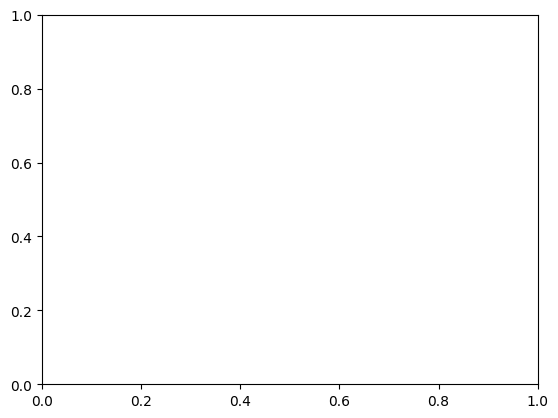

In [343]:
fig, ax = plt.subplots()


As you can see, matplotlib will automatically display your figure and your axes on it.

The variable `ax` holds an axes object that contains different plotting methods and the variable `fig` holds the whole figure:

In [344]:
print(type(ax))
print(type(fig))


<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.figure.Figure'>


# Line plot

A basic line plot can be created with the method `plot`, which we can use to see how many Pokémon were introduced in each generation of the game:

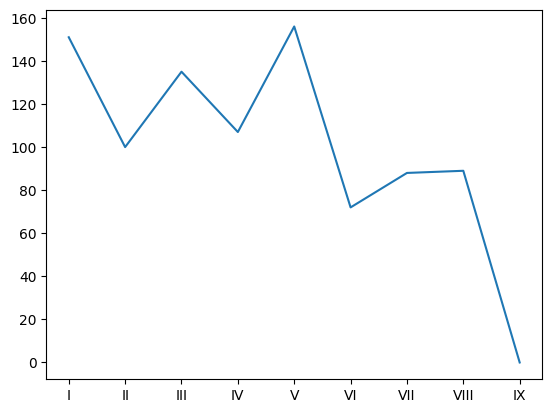

In [345]:
fig, ax = plt.subplots()

ax.plot(pokemon["gen"].value_counts(sort=False))

Notice how we set `sort=False` so that the value counts show up in the order of the category, otherwise they would be in descending order and the plot wouldn't make sense:

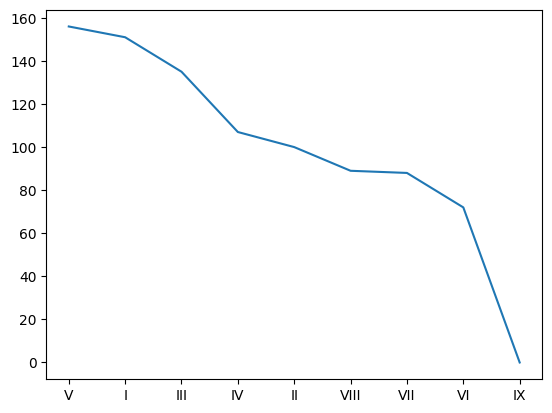

In [346]:
fig, ax = plt.subplots()

ax.plot(pokemon["gen"].value_counts())

One other touch up we can add, and that we'll be using throughout our plotting, is some basic configuration for the plot figure:

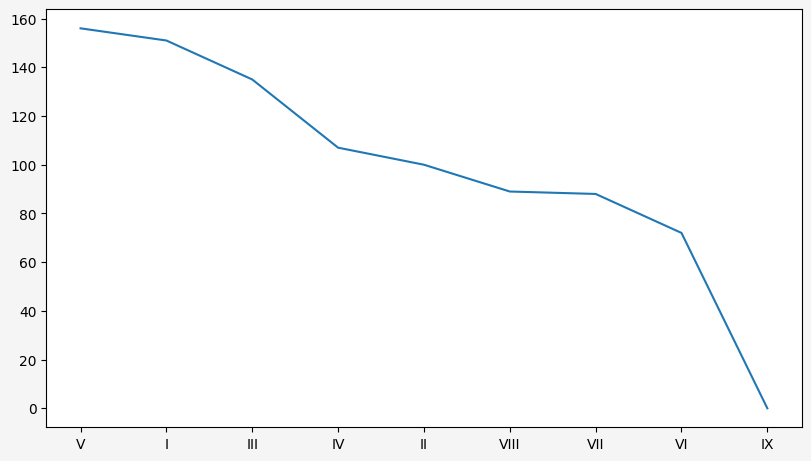

In [347]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.plot(pokemon["gen"].value_counts())

Here is a brief explanation of what each parameter does:

 - `figsize` controls the size (and aspect ratio) of the figure;
 - `facecolor` sets the colour of the graph, which is particularly important when you save the plot to a file.
 If you don't set this, the background colour of the plot will be transparent; and
 - `layout` optimises the way plots are laid out in your figures.
 The documentation recommends you set this but I am yet to understand the actual effect that this has on my plots.

## Markers in plots

Another thing we can do to help make the plot a bit more readable is to add markers to the data points that we have.
By using the parameter `marker`, we can use one of the many marker styles available:

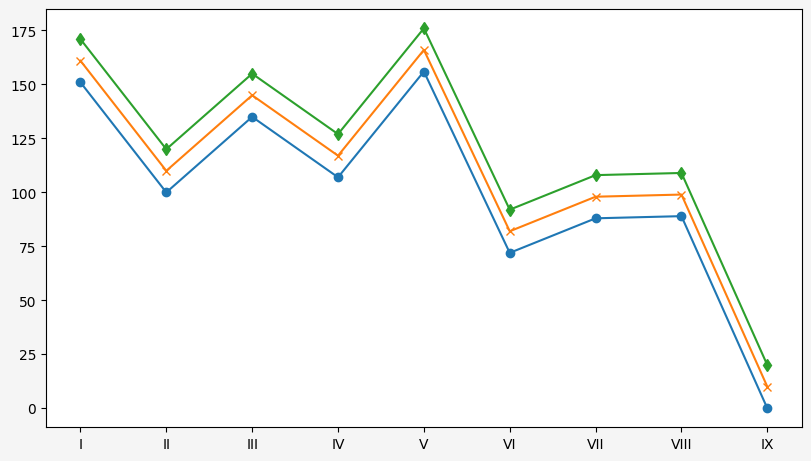

In [348]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.plot(pokemon["gen"].value_counts(sort=False), marker="o")
ax.plot(pokemon["gen"].value_counts(sort=False) + 10, marker="x")
ax.plot(pokemon["gen"].value_counts(sort=False) + 20, marker="d")

# Complete plots

A plot is never complete without three things:

 1. a title;
 2. an X axis label; and
 3. a Y axis label.

Adding those is straightforward:

Text(0, 0.5, 'Count')

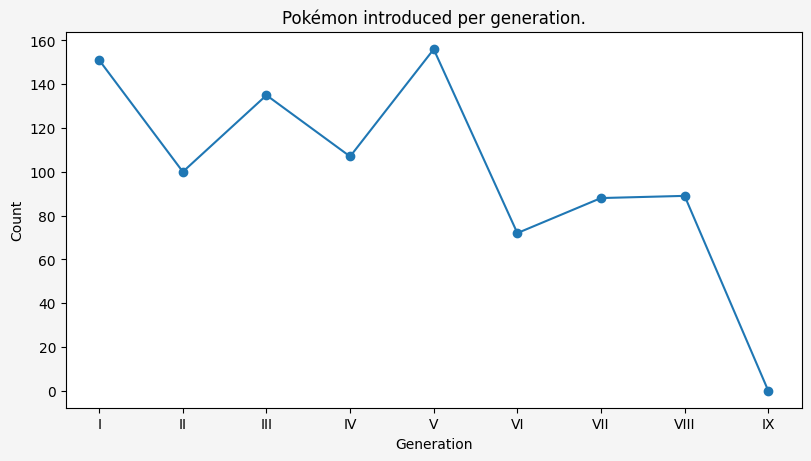

In [349]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.plot(pokemon["gen"].value_counts(sort=False), marker="o")
ax.set_title("Pokémon introduced per generation.")
ax.set_xlabel("Generation")
ax.set_ylabel("Count")

# Bar plots

## Basic plot

To create a bar plot you use the method `bar` on your axes object.
The method `bar` accepts two iterables:

 - one for the “x” positions of the bars in the plot; and
 - another for the height of each bar.

By using a range and the value counts of the column “gen”, we can visualise how many Pokémon were introduced in each generation:

<BarContainer object of 9 artists>

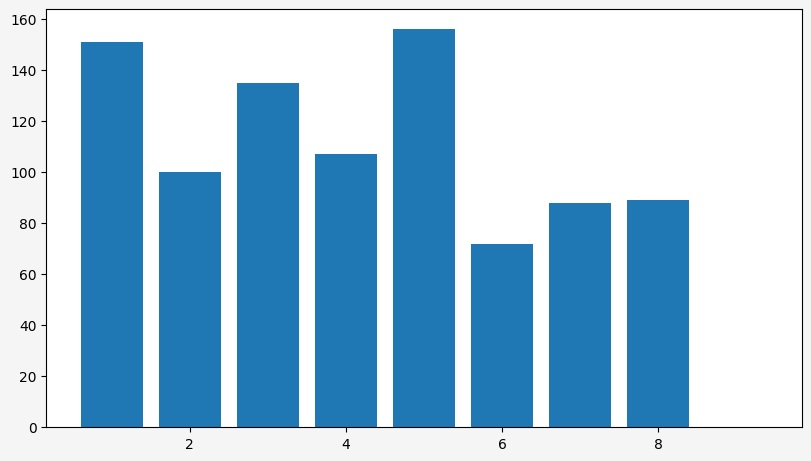

In [350]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)
ax.bar(range(1, 10), pokemon["gen"].value_counts(sort=False))

The plot above shows the number of Pokémon introduced with each new generation, from generation 1 to generation 9.
However, it is difficult to understand that we are supposedly showing an empty bar for generation 9, as there is no bar there _and_ there is no tick.

We can change this by setting the tick labels to be the generations themselves:

Text(0, 0.5, 'Count')

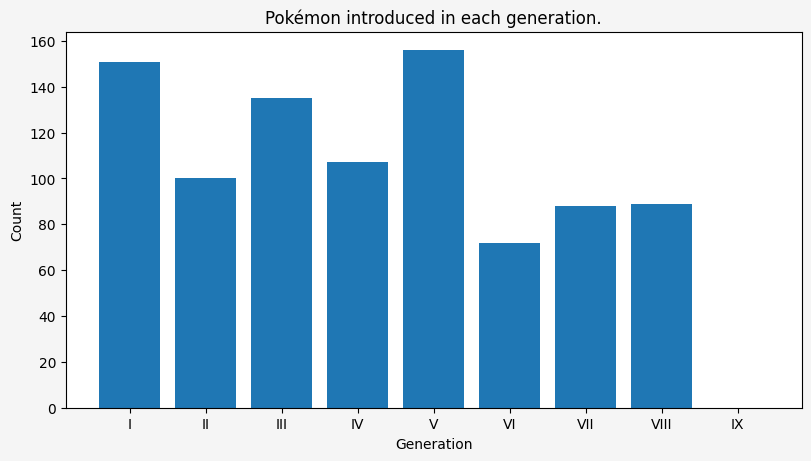

In [351]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.bar(range(1, 10), pokemon["gen"].value_counts(sort=False), tick_label=pokemon["gen"].cat.categories)
ax.set_title("Pokémon introduced in each generation.")
ax.set_xlabel("Generation")
ax.set_ylabel("Count")

## Plotting the Pokémon per primary type

Now we'll plot how many Pokémon there are in each type.
First, we create the basic plot with little customisation:

<BarContainer object of 18 artists>

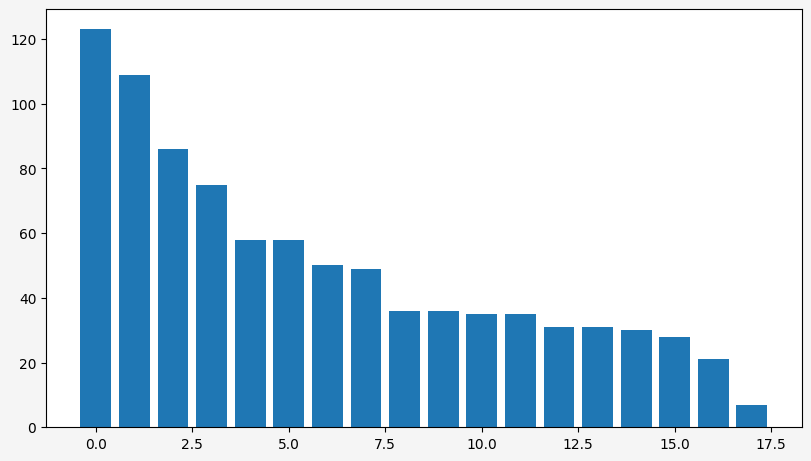

In [352]:
primary_type = pokemon["primary_type"]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)
ax.bar(range(primary_type.nunique()), primary_type.value_counts())


This shows the correct plot but we need proper labels in the horizontal axis so we know what label refers to what:

<BarContainer object of 18 artists>

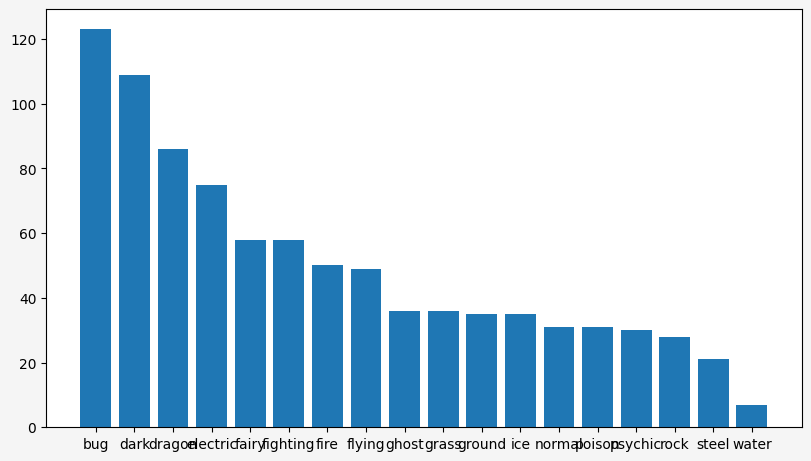

In [353]:
primary_type = pokemon["primary_type"]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)
ax.bar(range(primary_type.nunique()), primary_type.value_counts(), tick_label=primary_type.cat.categories)


These are unreadable because they overlap greatly.
To fix this, we want to rotate each label, so we'll use the method `set_xticks` to set the positions, text, and rotation of the tick labels:

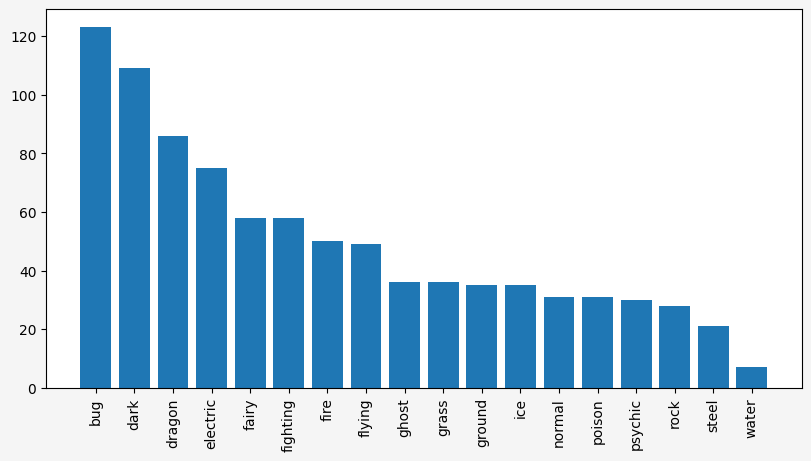

In [354]:
primary_type = pokemon["primary_type"]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.bar(range(primary_type.nunique()), primary_type.value_counts())
_ = ax.set_xticks(
    range(primary_type.nunique()),
    labels=primary_type.cat.categories,
    rotation=90,
)

Now, a very interesting thing that's happening here is that the plot is wrong!
That's because the order of the data and the labels are different:

In [355]:
primary_type.value_counts()


primary_type
water       123
normal      109
grass        86
bug          75
fire         58
psychic      58
rock         50
electric     49
fighting     36
dark         36
ground       35
poison       35
ghost        31
dragon       31
steel        30
ice          28
fairy        21
flying        7
Name: count, dtype: int64

In [356]:
primary_type.cat.categories


Index(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'],
      dtype='object')

We can fix this in whatever way we prefer, as long as the two orders match.

We'll go with the bar char ordered by frequency:

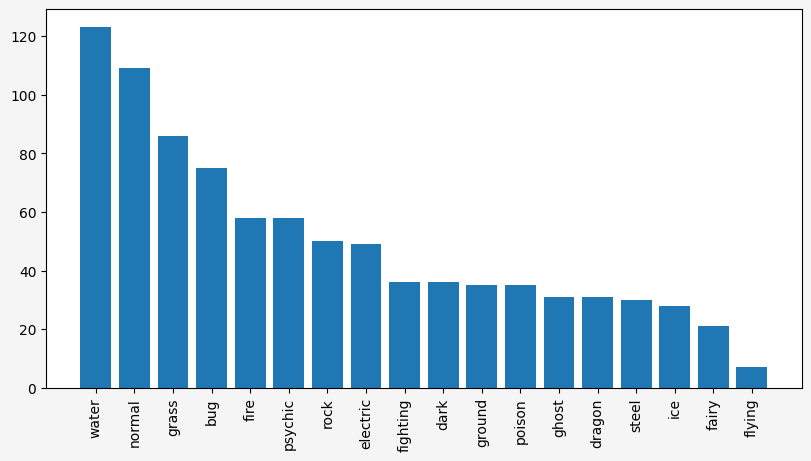

In [357]:
primary_type = pokemon["primary_type"]
value_counts = primary_type.value_counts()

primary_type = pokemon["primary_type"]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.bar(range(primary_type.nunique()), value_counts)
_ = ax.set_xticks(
    range(primary_type.nunique()),
    labels=value_counts.index,
    rotation=90,
)


Now, no plot is complete without a title and axes labels:

Text(0, 0.5, 'Count')

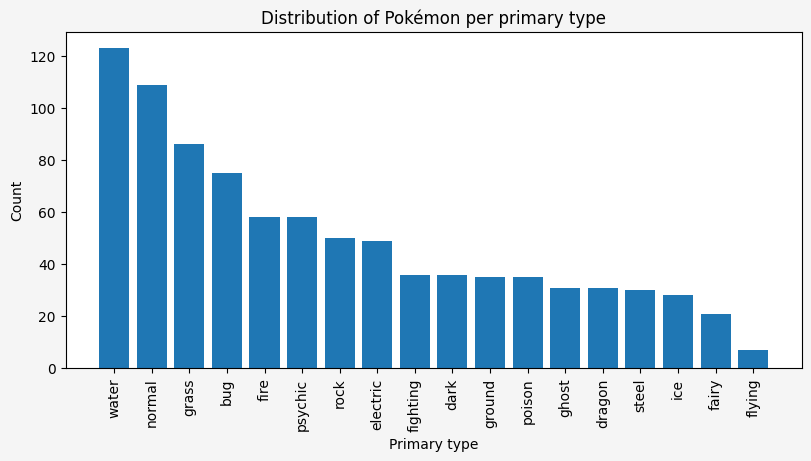

In [358]:
primary_type = pokemon["primary_type"]
value_counts = primary_type.value_counts()

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.bar(range(primary_type.nunique()), value_counts)
_ = ax.set_xticks(
    range(primary_type.nunique()),
    labels=value_counts.index,
    rotation=90,
)
ax.set_title("Distribution of Pokémon per primary type")
ax.set_xlabel("Primary type")
ax.set_ylabel("Count")


The colour of the bars can also be customised (along a gazillion other things).
Now, we will set the colour of each bar to match the colour of the primary type in the Pokémon franchise.

I got this colour data from the Internet:

In [359]:
type_colours_data = {
    "normal": "#A8A77A",
    "fire": "#EE8130",
    "water": "#6390F0",
    "electric": "#F7D02C",
    "grass": "#7AC74C",
    "ice": "#96D9D6",
    "fighting": "#C22E28",
    "poison": "#A33EA1",
    "ground": "#E2BF65",
    "flying": "#A98FF3",
    "psychic": "#F95587",
    "bug": "#A6B91A",
    "rock": "#B6A136",
    "ghost": "#735797",
    "dragon": "#6F35FC",
    "dark": "#705746",
    "steel": "#B7B7CE",
    "fairy": "#D685AD",
}


Now, we need to extract the colour values in the same order as the types will be printed and then we use the parameter `color` when creating the plot:

Text(0, 0.5, 'Count')

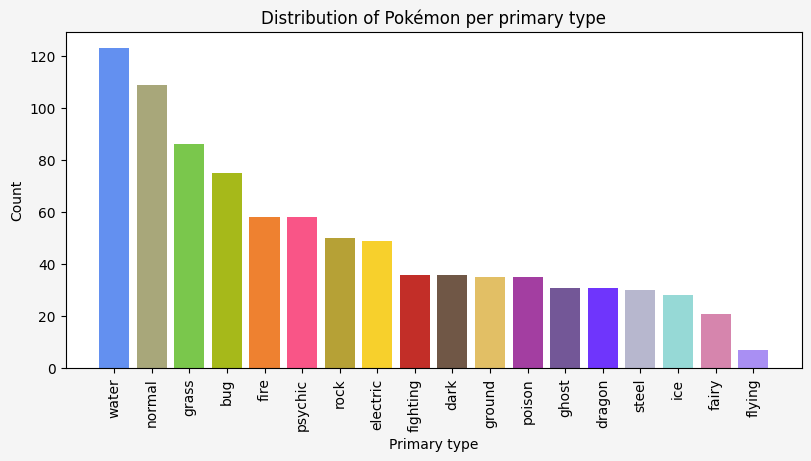

In [360]:
primary_type = pokemon["primary_type"]
value_counts = primary_type.value_counts()
colours = [type_colours_data[type_] for type_ in value_counts.index]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.bar(range(primary_type.nunique()), value_counts, color=colours)
_ = ax.set_xticks(
    range(primary_type.nunique()),
    labels=value_counts.index,
    rotation=90,
)
ax.set_title("Distribution of Pokémon per primary type")
ax.set_xlabel("Primary type")
ax.set_ylabel("Count")


If you use `barh` instead of `bar`, the bars can be made horizontal.
Then, you just need to remove the rotation of the axis labels and substitute references to “x” with “y” and vice-versa:

Text(0.5, 0, 'Count')

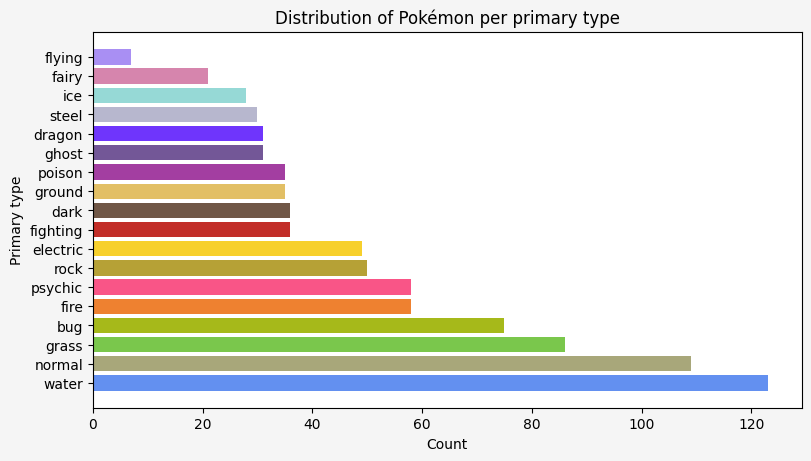

In [361]:
primary_type = pokemon["primary_type"]
value_counts = primary_type.value_counts()
colours = [type_colours_data[type_] for type_ in value_counts.index]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.barh(range(primary_type.nunique()), value_counts, color=colours)
_ = ax.set_yticks(
    range(primary_type.nunique()),
    labels=value_counts.index,
)
ax.set_title("Distribution of Pokémon per primary type")
ax.set_ylabel("Primary type")
ax.set_xlabel("Count")


We can also flip the order of the bars:

Text(0.5, 0, 'Count')

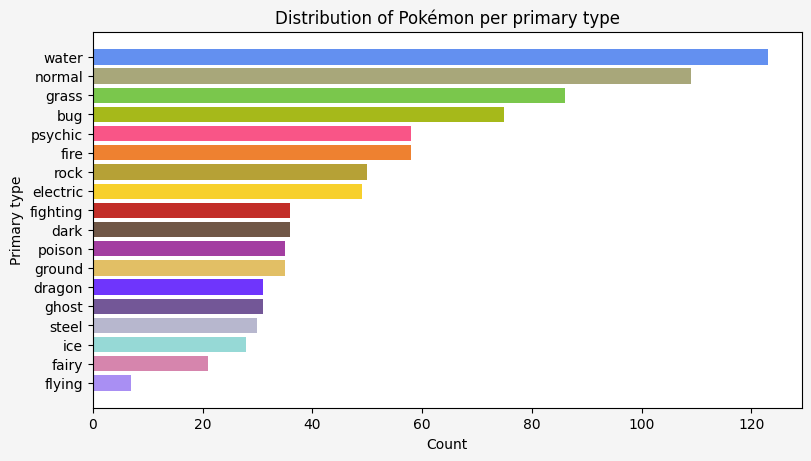

In [362]:
primary_type = pokemon["primary_type"]
value_counts = primary_type.value_counts(ascending=True)
colours = [type_colours_data[type_] for type_ in value_counts.index]

fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.barh(range(primary_type.nunique()), value_counts, color=colours)
_ = ax.set_yticks(
    range(primary_type.nunique()),
    labels=value_counts.index,
)
ax.set_title("Distribution of Pokémon per primary type")
ax.set_ylabel("Primary type")
ax.set_xlabel("Count")


# Scatter plots

We can also create scatter plots, which let you distribute all of your data on a 2D referential.
You'll typicall use scatter plots with two continuous variables.
For example, in the plot below we'll investigate if there seems to be a relationship between the stats “attack” and “special attack” of Pokémon:

Text(0, 0.5, 'Base special attack')

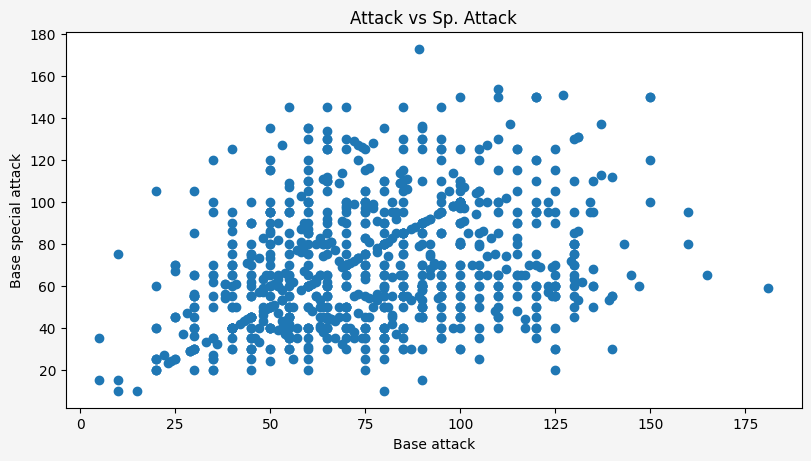

In [363]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.scatter(pokemon["attack"], pokemon["sp_attack"])
ax.set_title("Attack vs Sp. Attack")
ax.set_xlabel("Base attack")
ax.set_ylabel("Base special attack")

We can see that there seems to be a pretty consistent and uniform blob, which seems to imply there is no huge correlation between the two, other than the apparent faint diagonal line you can see in the plot.
Pandas confirms this by saying that the correlation between the two stats is 0.32:

In [364]:
pokemon[["attack", "sp_attack"]].corr()


,attack,sp_attack
attack,1.000000,0.319612
sp_attack,0.319612,1.000000


Points can also be assigned individual colours, which may let us distinguish between multiple types of points.
For example, we can easily distinguish legendary Pokémon from non-legendary Pokémon:

Text(0, 0.5, 'Base special attack')

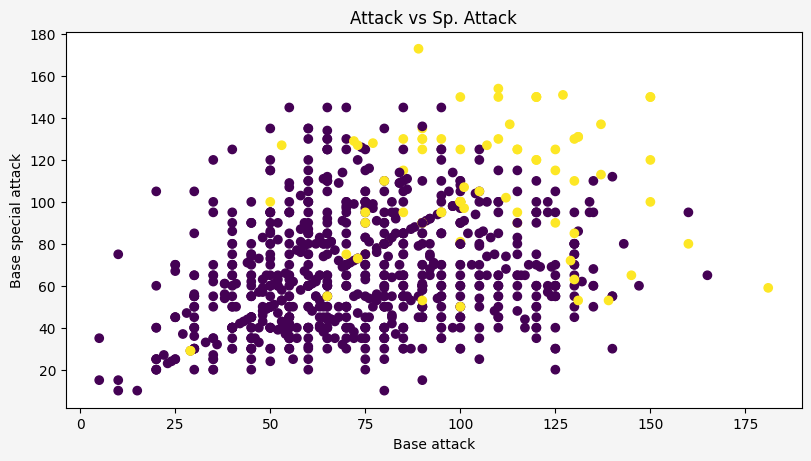

In [365]:
fig, ax = plt.subplots(
    figsize=(8, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.scatter(pokemon["attack"], pokemon["sp_attack"], c=pokemon["legendary"])
ax.set_title("Attack vs Sp. Attack")
ax.set_xlabel("Base attack")
ax.set_ylabel("Base special attack")


When we have 2 or more colours representing different categories, it is good to add a legend to the colour, so that we know what colour is what.
To do this, we can use the method `scatter` for each individual group of points, specify a `label`, and then use `legend` to show the legend:

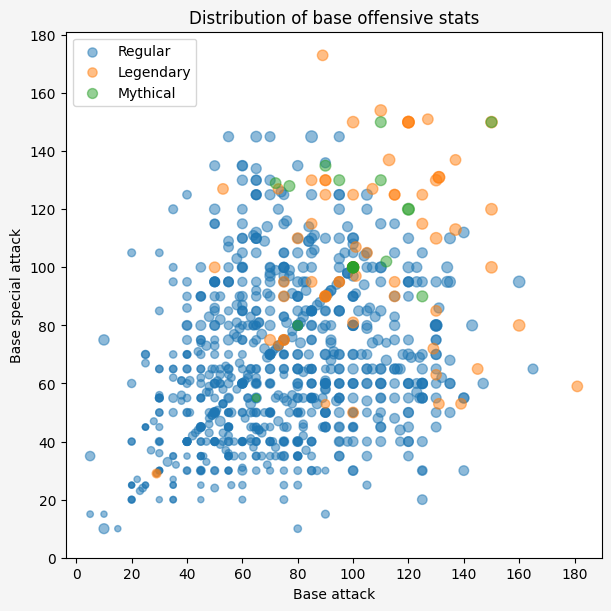

In [366]:
fig, ax = plt.subplots(
    figsize=(6, 6),
    facecolor="whitesmoke",
    layout="constrained",
)

statx, staty = pokemon["attack"], pokemon["sp_attack"]
category_masks = {
    "Regular": ~pokemon["legendary"],
    "Legendary": pokemon["is_sublegendary"] | pokemon["is_legendary"],
    "Mythical": pokemon["is_mythical"],
}

for label, mask in category_masks.items():
    ax.scatter(
        statx[mask],
        staty[mask],
        s=pokemon["total"][mask] / 10,
        label=label,
        alpha=0.5,
    )

ax.set_xticks(range(0, 181, 20))
ax.set_yticks(range(0, 181, 20))
ax.set_title("Distribution of base offensive stats")
ax.set_xlabel("Base attack")
ax.set_ylabel("Base special attack")
ax.legend(loc="upper left")

To create the plot above, we started by creating a dictionary that maps the names of the categories/groups of Pokémon to the corresponding Boolean masks.
Then, for each mask, we create a scatter plot with the appropriate data.

On top of that, we set
 - the size `s` of each point to depend on the total strength of each Pokémon; and
 - the parameter `alpha` to `0.5` so it's easier to see overlapped points.

# Violin plots

We've used scatter plots to study the relationship between two stats but what if we want to study how a single stat varies between legendary and non-legendary Pokémon?
Or what about stat variations among different types of Pokémon?

For these types of situations we can use a violin plot, which shows the distribution of a single variable.
For example, let us compare the total base stats of regular Pokémon with the total base stats of legendary Pokémon:

Text(0.5, 1.0, 'Comparison of total base stats.')

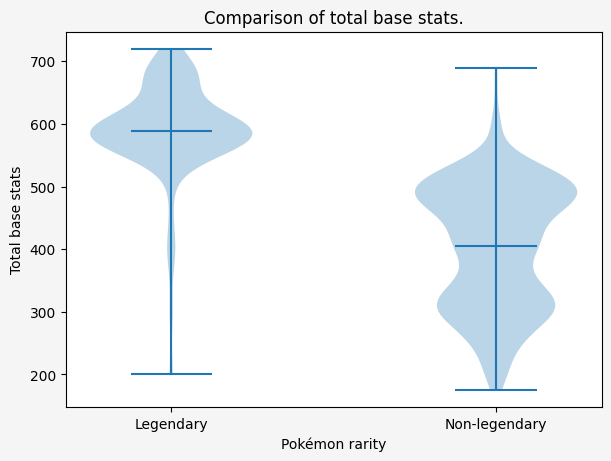

In [377]:
fig, ax = plt.subplots(
    figsize=(6, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.violinplot(
    (pokemon["total"][pokemon["legendary"]], pokemon["total"][~pokemon["legendary"]]),
    showmeans=True,
)
ax.set_xticks((1, 2), ("Legendary", "Non-legendary"))
ax.set_xlabel("Pokémon rarity")
ax.set_ylabel("Total base stats")
ax.set_title("Comparison of total base stats.")

The plot above shows two blobs, one for each rarity level: legendary and non-legendary.
The three horizontal bars show the min, mean, and max value of the variable being plotted.

We can see that the weakest and strongest Pokémon of each type of rarity have a pretty similar strength.
That's because the lowest horizontal bars are almost at the same height, and the same thing for the highest horizontal bars.
However, the middle horizontal bar, which marks the mean value of the variable, shows that legendary Pokémon are much stronger than regular Pokémon _on average_.

What we've done with legendary and non-legendary Pokémon for the total base stats can also be done for other variables and segmentations of all Pokémon.
For example, is it true that electric Pokémon tend to be faster?

Text(0.5, 1.0, 'Comparison of base speed')

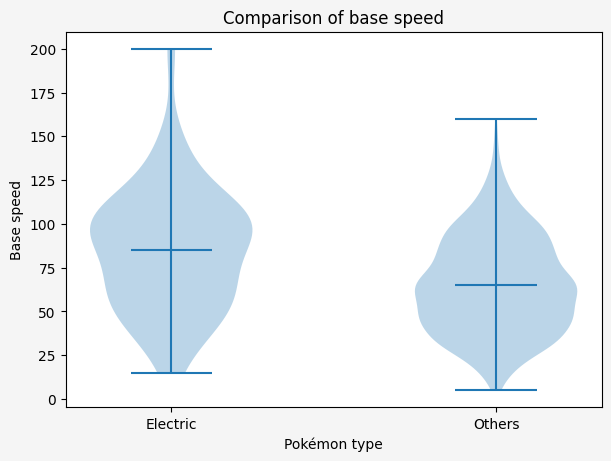

In [382]:
fig, ax = plt.subplots(
    figsize=(6, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.violinplot(
    (
        pokemon["speed"][pokemon["primary_type"] == "electric"],
        pokemon["speed"][pokemon["primary_type"] != "electric"],
    ),
    showmeans=True,
)
ax.set_xticks((1, 2), ("Electric", "Others"))
ax.set_xlabel("Pokémon type")
ax.set_ylabel("Base speed")
ax.set_title("Comparison of base speed")

What if we want to investigate flying Pokémon as well?

Text(0.5, 1.0, 'Comparison of base speed')

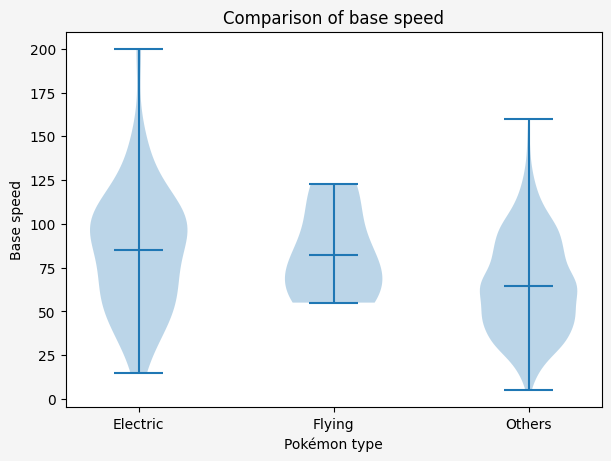

In [383]:
fig, ax = plt.subplots(
    figsize=(6, 4.5),
    facecolor="whitesmoke",
    layout="constrained",
)

ax.violinplot(
    (
        pokemon["speed"][pokemon["primary_type"] == "electric"],
        pokemon["speed"][pokemon["primary_type"] == "flying"],
        pokemon["speed"][(pokemon["primary_type"] != "electric") & (pokemon["primary_type"] != "flying")],
    ),
    showmeans=True,
)
ax.set_xticks((1, 2, 3), ("Electric", "Flying", "Others"))
ax.set_xlabel("Pokémon type")
ax.set_ylabel("Base speed")
ax.set_title("Comparison of base speed")

That's it for this Pandas and matplotlib tutorial introduction!

We've gone through many new concepts like series, dataframes, broadcasting, categories, figures and axes, many different types of plots, and more!
Take a break and then go back to the [questions](#Questions) I shared above.
Can you answer them with Pandas/some plots?
Share your nicest plots in the comments!